In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv("vgsales.csv")

In [6]:
df.head(10) #primeras n filas
#df.tail(10) #ultimas n filas

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [12]:
nummeric_columns= []
for col in df.columns:
    if df[col].dtype != "0":
        nummeric_columns.append(col)

nummeric_columns = [col for col in df.columns if df[col].dtype != "0"]

ModuleNotFoundError: No module named 'scipy'

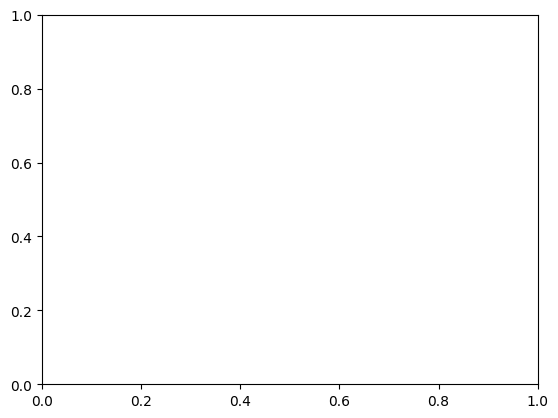

In [18]:
for col in nummeric_columns:
    df[col].plot.kde()
    plt.show()

In [28]:
print("Medidas de tendencia central")
print(f"Suma: {df['Year'].sum()}")
print(f"Promedio: {df['Year'].mean()}")
print(f"Mediana: {df['Year'].median()}")
print(f"Moda: {df['Year'].mode()}")

Medidas de tendencia central
Suma: 32758598.0
Promedio: 2006.4064433147546
Mediana: 2007.0
Moda: 0    2009.0
Name: Year, dtype: float64


In [29]:
df[df["Year"] <= 1990][["Name","Platform"]]

,Name,Platform
1,Super Mario Bros.,NES
5,Tetris,GB
9,Duck Hunt,NES
18,Super Mario World,SNES
21,Super Mario Land,GB
...,...,...
11749,Super Baseball,2600
12636,Adventures of Lolo,NES
14335,Alter Ego,PC
14507,SimCity,PC


In [30]:
df[(df["Year"] > 2000) & (df["Publisher"] == "Nintendo")]["Name"]

0                                               Wii Sports
2                                           Mario Kart Wii
3                                        Wii Sports Resort
6                                    New Super Mario Bros.
7                                                 Wii Play
                               ...                        
16269                             Slide Adventure: Mag Kid
16357                 Mario vs. Donkey Kong: Tipping Stars
16456                             Art Academy: Home Studio
16473                                      Captain Rainbow
16542    Mario & Luigi: Paper Jam & Mario Kart 7 Double...
Name: Name, Length: 502, dtype: object

In [31]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [32]:
df[df["Platform"].isin(["PS","N64","SAT"])]["Name"]

46                      Super Mario 64
52                        Gran Turismo
63                       Mario Kart 64
66                   Final Fantasy VII
69                      Gran Turismo 2
                     ...              
16506    Samurai Shodown: Warrios Rage
16518                 Crossroad Crisis
16554                Psychic Detective
16579                PGA European Tour
16583                   Carmageddon 64
Name: Name, Length: 1688, dtype: object

In [33]:
df["Platform"].value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [34]:
df["Year"].value_counts(bins=10)

(2004.0, 2008.0]      4579
(2008.0, 2012.0]      4486
(2000.0, 2004.0]      2849
(2012.0, 2016.0]      2086
(1996.0, 2000.0]      1355
(1992.0, 1996.0]       663
(1979.959, 1984.0]     122
(1988.0, 1992.0]       117
(1984.0, 1988.0]        66
(2016.0, 2020.0]         4
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

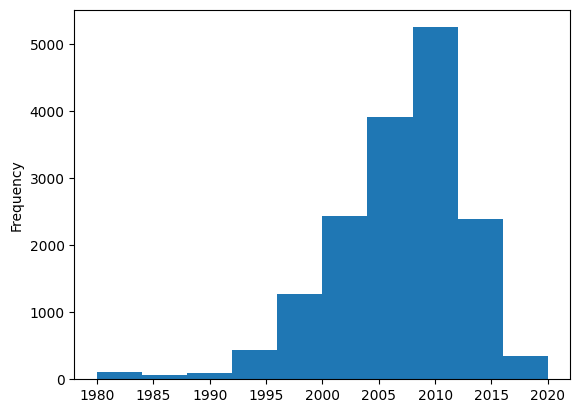

In [35]:
df["Year"].plot.hist(bins=10)